In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Load required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import joblib

In [3]:
#load the dataset
df = pd.read_csv('/content/drive/MyDrive/flo_data_20k.csv')

In [4]:
# Display the first few rows to understand the dataset
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [5]:
df.isnull().sum()

,0
master_id,0
order_channel,0
last_order_channel,0
first_order_date,0
last_order_date,0
last_order_date_online,0
last_order_date_offline,0
order_num_total_ever_online,0
order_num_total_ever_offline,0
customer_value_total_ever_offline,0


In [19]:
df.describe()

,order_channel,last_order_channel,last_order_date,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,recency,Cluster
count,19945.000000,19945.000000,19945,19945.000000,19945.000000,19945.000000,19945.000000,19945.000000,19945.000000,19945.000000
mean,1.155528,2.056957,2021-01-17 12:59:57.653547264,3.110855,1.913913,253.922597,497.321690,21.521835,1387.458360,2.319378
min,0.000000,0.000000,2020-05-30 00:00:00,1.000000,1.000000,10.000000,12.990000,0.000000,1255.000000,0.000000
25%,0.000000,0.000000,2020-11-11 00:00:00,1.000000,1.000000,99.990000,149.980000,16.000000,1296.000000,0.000000
50%,1.000000,2.000000,2021-02-10 00:00:00,2.000000,1.000000,179.980000,286.460000,22.000000,1364.000000,4.000000
75%,2.000000,4.000000,2021-04-19 00:00:00,4.000000,2.000000,319.970000,578.440000,29.000000,1455.000000,4.000000
max,3.000000,4.000000,2021-05-30 00:00:00,200.000000,109.000000,18119.140000,45220.130000,31.000000,1620.000000,5.000000
std,1.254226,1.710572,NaN,4.225647,2.062880,301.532853,832.601886,8.398788,103.281149,1.848878


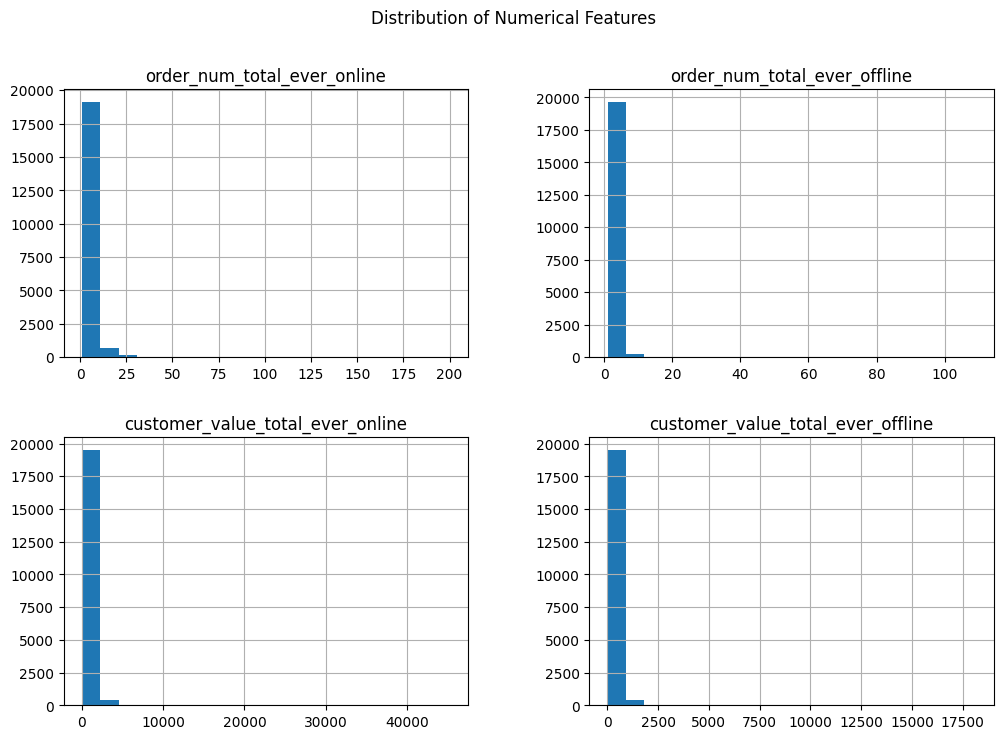

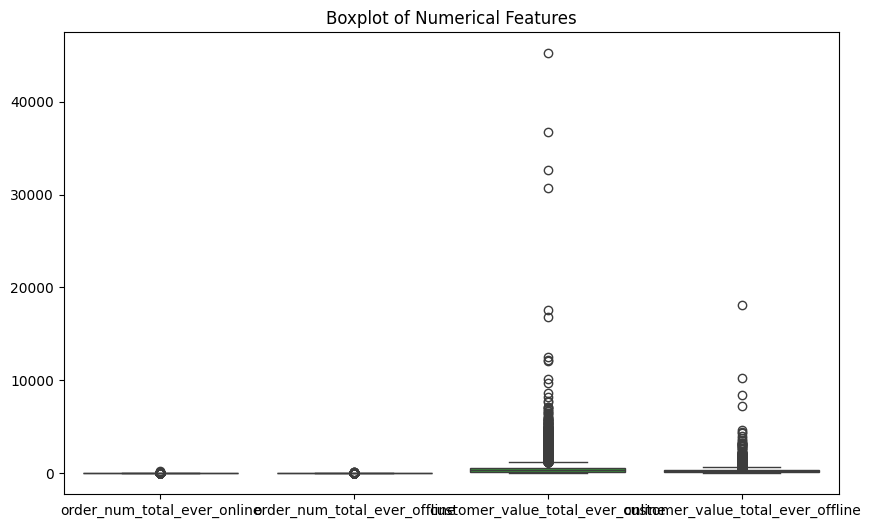

In [20]:
# Visualizing the distribution of numerical variables
numerical_cols = ['order_num_total_ever_online', 'order_num_total_ever_offline',
                  'customer_value_total_ever_online', 'customer_value_total_ever_offline']

# Plot histograms for each numerical feature
df[numerical_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of Numerical Features')
plt.show()


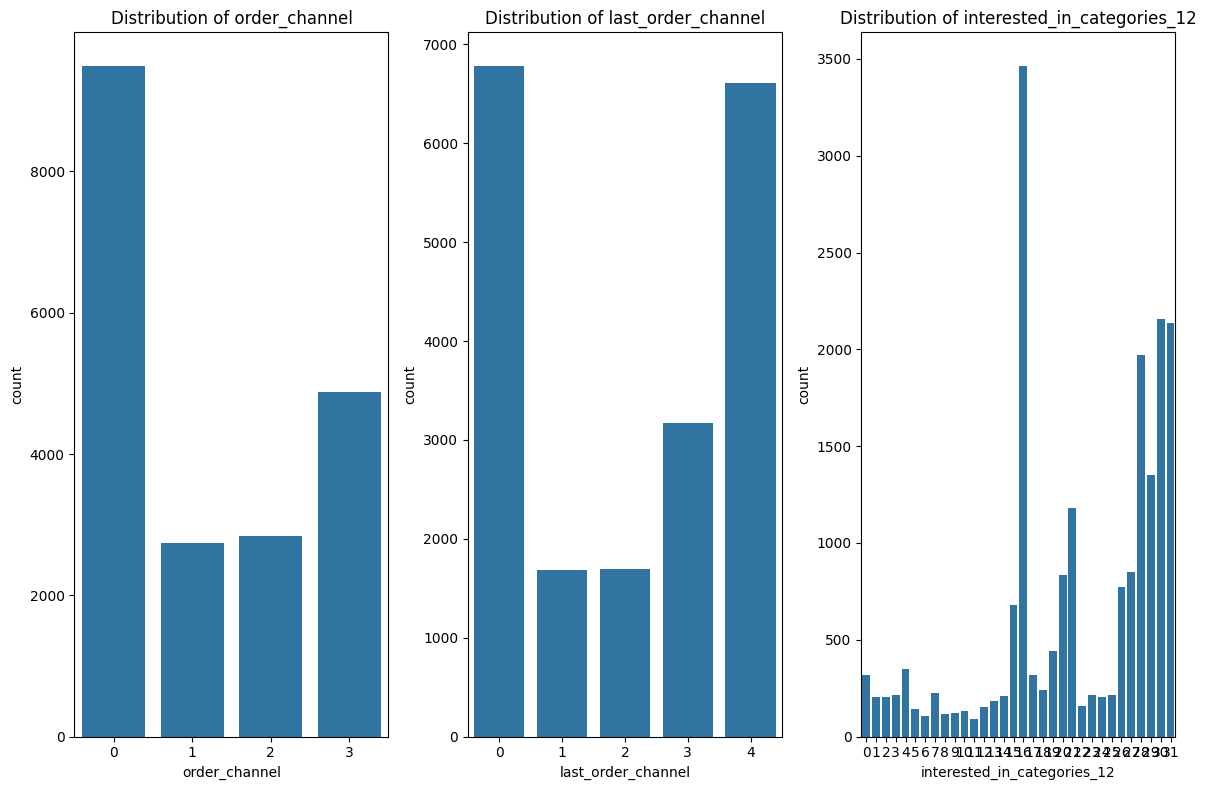

In [21]:
# Countplot for categorical features
categorical_cols = ['order_channel', 'last_order_channel', 'interested_in_categories_12']

# Plot countplots for categorical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


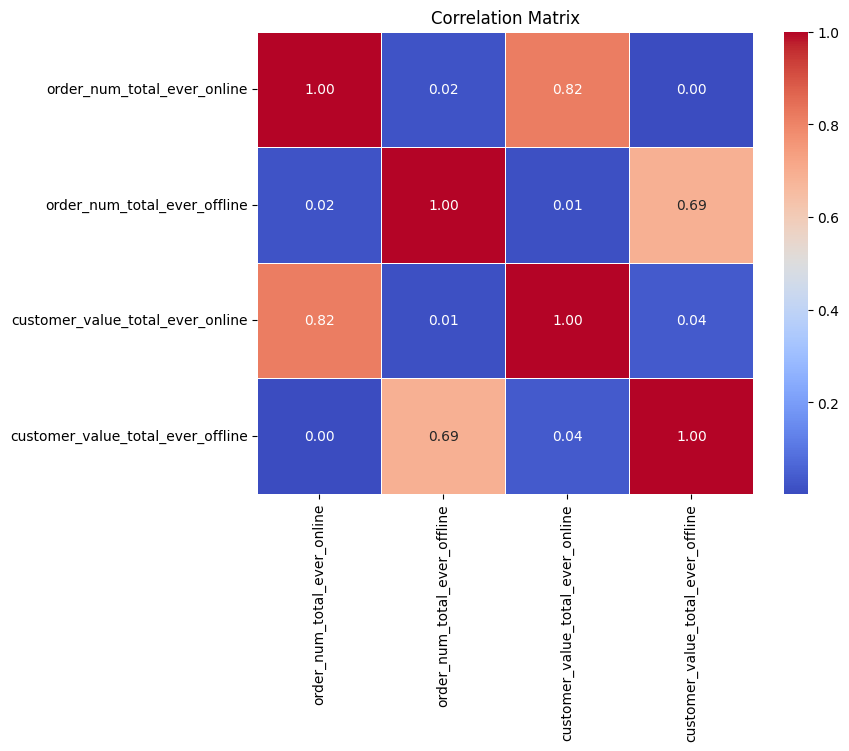

In [22]:
# Correlation heatmap for numerical variables
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


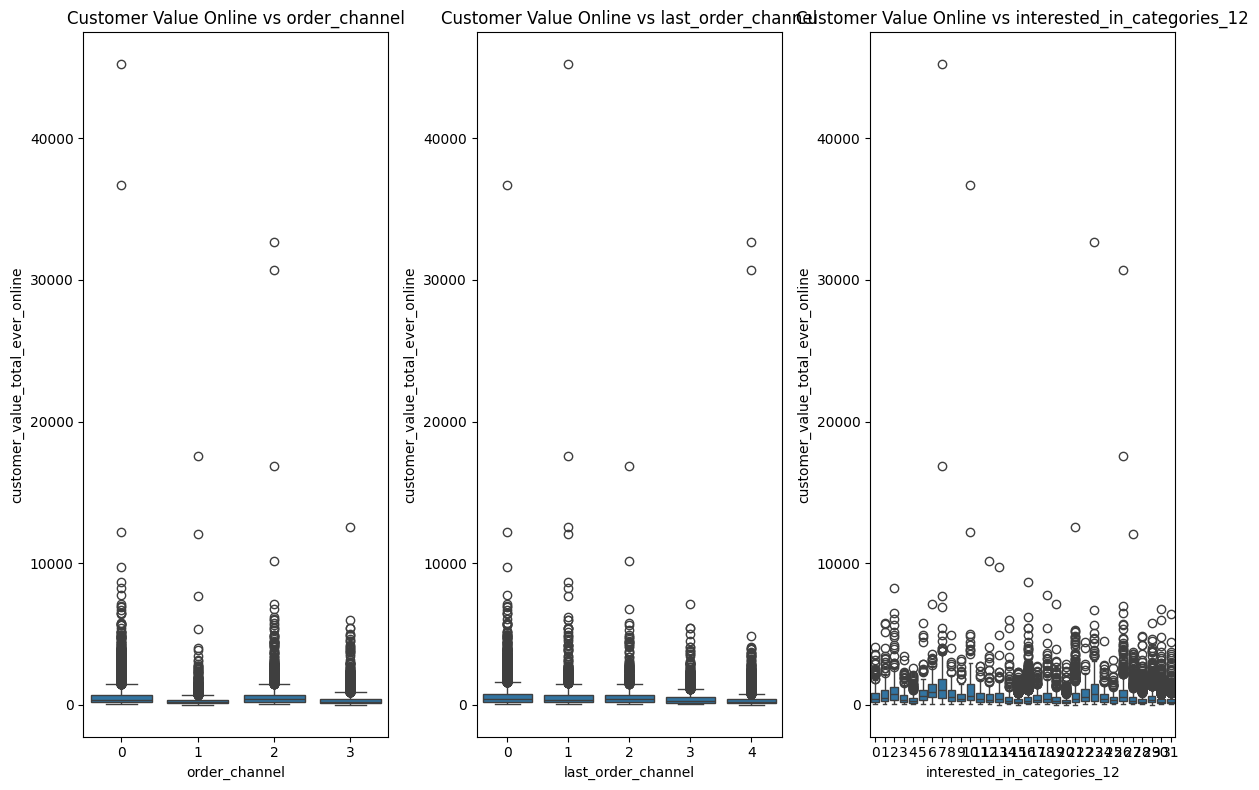

In [23]:
# Boxplot for numerical features across categorical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x=col, y='customer_value_total_ever_online')
    plt.title(f'Customer Value Online vs {col}')
plt.tight_layout()
plt.show()

In [24]:
# Outliers detection using Z-score for numerical features
from scipy.stats import zscore

# Calculate z-scores for numerical features
z_scores = np.abs(zscore(df[numerical_cols]))
outliers = (z_scores > 3).sum(axis=0)

print("Number of outliers per numerical feature:", outliers)


Number of outliers per numerical feature: order_num_total_ever_online          343
order_num_total_ever_offline         126
customer_value_total_ever_online     214
customer_value_total_ever_offline    232
dtype: int64


Data Preprocessing

In [8]:
#Categorical values

label_encoders = {}
categorical_columns = ['order_channel', 'last_order_channel', 'interested_in_categories_12']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [9]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,0,4,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,30
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,0,3,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,23
2,69b69676-1a40-11ea-941b-000d3a38a36f,0,0,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,27
3,1854e56c-491f-11eb-806e-000d3a38a36f,0,0,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,4
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,1,1,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,16


In [10]:
#Handling Date Columns
# Convert the 'last_order_date' column to datetime
df['last_order_date'] = pd.to_datetime(df['last_order_date'])

# Compute recency in days (difference between today and the last order date)
today = pd.to_datetime('today')
df['recency'] = (today - df['last_order_date']).dt.days

# Check the new dataset with recency
print(df[['master_id', 'last_order_date', 'recency']].head())

                              master_id last_order_date  recency
0  cc294636-19f0-11eb-8d74-000d3a38a36f      2021-02-26     1348
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f      2021-02-16     1358
2  69b69676-1a40-11ea-941b-000d3a38a36f      2020-11-27     1439
3  1854e56c-491f-11eb-806e-000d3a38a36f      2021-01-17     1388
4  d6ea1074-f1f5-11e9-9346-000d3a38a36f      2021-03-07     1339


In [11]:
#Feature Selection
# Selecting features for clustering
features = ['recency', 'order_num_total_ever_online', 'order_num_total_ever_offline',
            'customer_value_total_ever_online', 'customer_value_total_ever_offline']

# Extract feature matrix
X = df[features]

# Standardize the features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the scaled features
print(X_scaled[:5])


[[-0.38205762  0.21042161 -0.4430389   0.3627975  -0.37785419]
 [-0.2852321   3.76026292  0.04173238  1.62898059 -0.3115911 ]
 [ 0.49905459 -0.02623448  0.04173238 -0.1224766  -0.21209696]
 [ 0.00524445 -0.49954665 -0.4430389  -0.49886039 -0.70950133]
 [-0.46920058 -0.49954665 -0.4430389  -0.4051638  -0.67633662]]


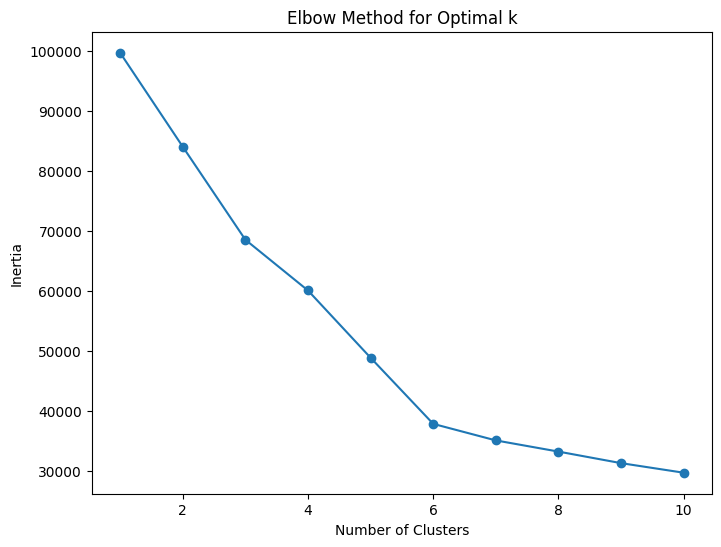

In [26]:
#finding optimal number of Cluster
# Elbow method to find optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [13]:
# Silhouette score to evaluate clustering
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    print(f'Silhouette Score for k={k}: {score}')


Silhouette Score for k=2: 0.2621547810587916
Silhouette Score for k=3: 0.3118926680195921
Silhouette Score for k=4: 0.31650262027732523
Silhouette Score for k=5: 0.3519210813705544
Silhouette Score for k=6: 0.35564953637494146
Silhouette Score for k=7: 0.3298334248979125
Silhouette Score for k=8: 0.3248151296782691
Silhouette Score for k=9: 0.3264538505781917
Silhouette Score for k=10: 0.3203718279326588


In [29]:
# Apply K-means with the chosen number of clusters (k=4)
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Check the distribution of the clusters
print(df['Cluster'].value_counts())


Cluster
4    10166
0     6554
1     2050
3     1154
5       14
2        7
Name: count, dtype: int64


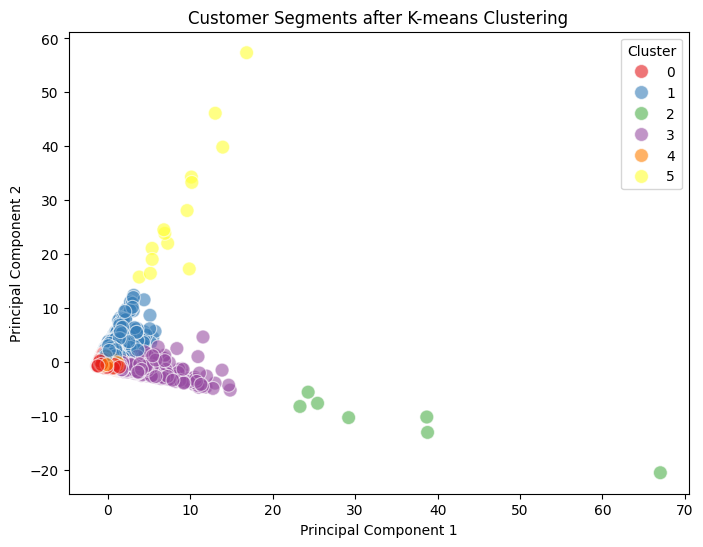

In [30]:
# Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components and cluster labels
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, alpha=0.6, edgecolor='w')
plt.title('Customer Segments after K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


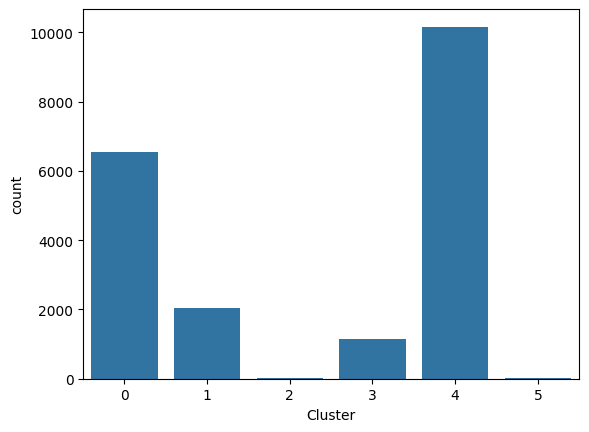

In [34]:
sns.countplot(x='Cluster', data=df)
plt.show()

In [31]:
# Analyze the mean values of each cluster
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)

             recency  order_num_total_ever_online  \
Cluster                                             
0        1507.697589                     2.194233   
1        1356.567317                     2.622439   
2        1295.428571                    89.000000   
3        1347.015598                    14.371750   
4        1320.797069                     2.462817   
5        1406.928571                     3.142857   

         order_num_total_ever_offline  customer_value_total_ever_online  \
Cluster                                                                   
0                            1.538602                        337.118483   
1                            4.675122                        424.995468   
2                            1.571429                      27416.995714   
3                            1.876083                       2303.496205   
4                            1.534133                        391.286085   
5                           52.357143             

In [32]:
# Save the model and scaler using joblib
joblib.dump(kmeans, '/content/drive/MyDrive/kmeans_model.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/scaler.pkl')

# Save label encoders for categorical variables
joblib.dump(label_encoders, '/content/drive/MyDrive/label_encoders.pkl')


['/content/drive/MyDrive/label_encoders.pkl']

In [33]:
# Load the saved K-means model, scaler, and label encoders
kmeans_loaded = joblib.load('/content/drive/MyDrive/kmeans_model.pkl')
scaler_loaded = joblib.load('/content/drive/MyDrive/scaler.pkl')
label_encoders_loaded = joblib.load('/content/drive/MyDrive/label_encoders.pkl')

# Example: New customer data for prediction (replace with actual data)
new_data = pd.DataFrame({
    'recency': [100],
    'order_num_total_ever_online': [5],
    'order_num_total_ever_offline': [3],
    'customer_value_total_ever_online': [500],
    'customer_value_total_ever_offline': [300]
})

# Scale the new data
new_data_scaled = scaler_loaded.transform(new_data)

# Predict the cluster for the new customer data
predicted_cluster = kmeans_loaded.predict(new_data_scaled)
print(f'The new customer belongs to Cluster {predicted_cluster[0]}')


The new customer belongs to Cluster 4
